<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tensorflow's-Object-Detection-API" data-toc-modified-id="Tensorflow's-Object-Detection-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tensorflow's Object Detection API</a></span></li><li><span><a href="#Create-a-new-environment-and-install-required-packages" data-toc-modified-id="Create-a-new-environment-and-install-required-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a new environment and install required packages</a></span></li><li><span><a href="#Download-and-prepare-Google's-Object-Detection-API" data-toc-modified-id="Download-and-prepare-Google's-Object-Detection-API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download and prepare Google's Object Detection API</a></span></li><li><span><a href="#Protobuf" data-toc-modified-id="Protobuf-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Protobuf</a></span></li><li><span><a href="#Check-whether-all-packages-are-available" data-toc-modified-id="Check-whether-all-packages-are-available-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check whether all packages are available</a></span></li><li><span><a href="#Choose-an-Object-Detection-model-from-the-Model-Zoo" data-toc-modified-id="Choose-an-Object-Detection-model-from-the-Model-Zoo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Choose an Object Detection model from the Model Zoo</a></span></li><li><span><a href="#Download-the-model" data-toc-modified-id="Download-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Download the model</a></span></li><li><span><a href="#Load-the-model-into-RAM" data-toc-modified-id="Load-the-model-into-RAM-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Load the model into RAM</a></span></li><li><span><a href="#Load-the-label-map" data-toc-modified-id="Load-the-label-map-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Load the label map</a></span></li><li><span><a href="#Testing-the-object-detector" data-toc-modified-id="Testing-the-object-detector-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Testing the object detector</a></span></li></ul></div>

# Tensorflow's Object Detection API

Now that we know how object detection models as R-CNN, Fast R-CNN, Faster R-CNN and co. work it would be cool to try them out!

Fortunately, there is [Tensorflow's Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) which provides reference implementations and pre-trained models such that we can quickly use these models.

It is a part of [Tensorflow Models API](https://github.com/tensorflow/models), a repository which contains a number of different models implemented in TensorFlow.

Which pretrained models are available? See [here in the model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md)

*Acknowledgement: I wish to thank Bonifaz Stuhr for helping me to prepare this exercise.*

# Create a new environment and install required packages

In [ ]:
# Search for Anaconda console
# Start it as administrator
# Then enter the following commands:

# create environment
conda create -n tf_objdetapi

# activate the environment just created
activate tf_objdetapi

In [ ]:
# Install TensorFlow
# That is Google's Deep Learning library
# we used so far as a backend from the
# frontend "Keras"
conda install tensorflow

# Here are other packages
# we need to install
conda install Cython
conda install contextlib2
conda install pillow
conda install lxml
conda install matplotlib
conda install jupyter
conda install -c conda-forge jupyter_contrib_nbextensions

# Download and prepare Google's Object Detection API

Go to [TensorFlow Models API](https://github.com/tensorflow/models) and click the green button "Clone or download", then download the code as a zip file (ca. 490 MB) and unzip it.

Then start Jupyter with the command

    jupyter notebook
    
from the Anaconda console and modify the following variable ``YOUR_DOWNLOAD_DIR_FOR_THE_MODELS_API`` to specify your download directory.

The variable is used to add the research models from the object_detection folder of the Tensorflow Models API (i.e. the Tensorflow Object Detection API) to the system path for this Jupyter session.

In [1]:
# USE // not \ for specifying the directory
YOUR_DOWNLOAD_DIR_FOR_THE_MODELS_API = "V://01_job//18_src//TensorFlow_ObjectDetection_API"
YOUR_DOWNLOAD_DIR_FOR_THE_OBJECT_DETECTION_API = YOUR_DOWNLOAD_DIR_FOR_THE_MODELS_API + "//research//object_detection"

import sys
sys.path.append(YOUR_DOWNLOAD_DIR_FOR_THE_MODELS_API+ "//research")
print(sys.path)

['', 'C:\\ProgramData\\Anaconda3\\envs\\tf_objdetapi\\python36.zip', 'C:\\ProgramData\\Anaconda3\\envs\\tf_objdetapi\\DLLs', 'C:\\ProgramData\\Anaconda3\\envs\\tf_objdetapi\\lib', 'C:\\ProgramData\\Anaconda3\\envs\\tf_objdetapi', 'C:\\ProgramData\\Anaconda3\\envs\\tf_objdetapi\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\envs\\tf_objdetapi\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Juergen Brauer\\.ipython', 'V://01_job//18_src//TensorFlow_ObjectDetection_API//research']


# Protobuf

The Tensorflow Object Detection API uses [Protobuf](https://developers.google.com/protocol-buffers/) to configure model and training parameters. Before the framework can be used, the Protobuf libraries of the API must be compiled.

For this, donwload Protoc **3.4.0** version of the Protobuf compiler (yes! exactly this version!) as a zip-file: [protoc-3.4.0-win32.zip](https://github.com/protocolbuffers/protobuf/releases/download/v3.4.0/protoc-3.4.0-win32.zip) and unzip it.

Then open a Windows PowerShell (since cmd does not support path/ commands) and compile the Tensorflow Object Detection API from the folder

    YOUR_DOWNLOAD_DIR_FOR_THE_MODELS_API//research

by running the following two commands:

In [ ]:
cd YOUR_DOWNLOAD_DIR_FOR_THE_MODELS_API//research
# e.g.
# cd V:\01_job\18_src\TensorFlow_ObjectDetection_API\research>

YOUR_DOWNLOAD_DIR_FOR_PROTOC//bin//protoc --python_out=. object_detection\protos\*.proto
# e.g.
# V:\01_job\18_src\protoc-3.4.0-win32\bin\protoc
# --python_out=. object_detection\protos\*.proto

Check whether everyting worked by navigating to folder

    YOUR_DOWNLOAD_DIR_FOR_THE_OBJECT_DETECTION_API//protos
    
and make sure that there a several ``.py`` files now.

# Check whether all packages are available

In [2]:
import os
import sys
import tarfile
import zipfile

import numpy as np
import tensorflow as tf
import six.moves.urllib as urllib

from PIL import Image
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt


print( "Your NumPy version is: " + np.__version__ )
print( "Your TensorFlow version is: " + tf.__version__)

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
    #
    # if the following error happens, upgrade TensorFlow by the following command:
    #     pip install tensorflow --upgrade
    #
    raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')
    
    
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline

Your NumPy version is: 1.16.4
Your TensorFlow version is: 1.13.1


# Choose an Object Detection model from the Model Zoo

Here we use a RetinaNet model. See the [Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

Any other model can be used by changing ``MODEL_NAME`` to the name of the downloadable tar.gz file from the models on this list.

Any model exported using the `export_inference_graph.py` tool can be loaded in the code below simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file. 

In [7]:
# Which model to download?
# see https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md

# mAP@COCO dataset: 0.32
#MODEL_NAME = 'ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'

# mAP@COCO dataset: 0.43
MODEL_NAME = 'faster_rcnn_nas_coco_2018_01_28'

MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model
# that is used for the object detection.
# pb stands for protobuf. In TensorFlow, the protbuf file
# contains the graph definition as well as the weights of
# the model. 
# Thus, a pb file is all you need to be able to run a
# given trained model.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '//frozen_inference_graph.pb' #

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = YOUR_DOWNLOAD_DIR_FOR_THE_OBJECT_DETECTION_API + \
                "//data//mscoco_label_map.pbtxt"

#PATH_TO_LABELS = YOUR_DOWNLOAD_DIR_FOR_THE_OBJECT_DETECTION_API + \
#                 "//data//oid_v4_label_map.pbtxt"

  
    
print("MODEL_NAME:", MODEL_NAME)
print("MODEL_FILE:", MODEL_FILE)
print("DOWNLOAD_BASE:", DOWNLOAD_BASE)
print("PATH_TO_FROZEN_GRAPH:", PATH_TO_FROZEN_GRAPH)
print("PATH_TO_LABELS: ", PATH_TO_LABELS)

MODEL_NAME: faster_rcnn_nas_coco_2018_01_28
MODEL_FILE: faster_rcnn_nas_coco_2018_01_28.tar.gz
DOWNLOAD_BASE: http://download.tensorflow.org/models/object_detection/
PATH_TO_FROZEN_GRAPH: faster_rcnn_nas_coco_2018_01_28//frozen_inference_graph.pb
PATH_TO_LABELS:  V://01_job//18_src//TensorFlow_ObjectDetection_API//research//object_detection//data//mscoco_label_map.pbtxt


The model used here is a ``RetinaNet``. It can be found [here at GitHub](https://github.com/tensorflow/models/blob/master/research/object_detection/models/ssd_resnet_v1_fpn_feature_extractor.py) or in your folder

    YOUR_DOWNLOAD_DIR_FOR_THE_OBJECT_DETECTION_API//models//ssd_resnet_v1_fpn_feature_extractor.py

And the corresponding paper here: [Focal Loss for Dense Object Detection](https://arxiv.org/abs/1708.02002)


# Download the model

Now that we have setup all the variables to download the object detection model we have to download it:

In [6]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

Have a look into your local directory of this notebook. You should find a .zip file and a subfolder containing the frozen inference graph.

# Load the model into RAM

The file is now on your disk. Let us load it into RAM now!

In [8]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Load the label map

Label maps map indices to category names, so that when our convolution network predicts 5, we know that this corresponds to class ``airplane``.

Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine.

In [9]:
from object_detection.utils import label_map_util

category_index = \
    label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                       use_display_name=True)

print("The model knows {} different object classes"
      .format(len(category_index)))
print("These classes are:")
print(category_index)



The model knows 80 different object classes
These classes are:
{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 't

# Testing the object detector

Now let us test the object detector with some of your own test images!

First, we need some helper function:

In [10]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [11]:
import os
from os import listdir
from os.path import isdir, isfile, join

#folder_name = "V:\\01_job\\18_src\\Deep_Learning_Course\\38_tensorflow_objdet_api\\test_images"
folder_name = "V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg"
ABSOLUTE_IMAGE_FILENAMES = [folder_name + "/" + f
                            for f in listdir(folder_name)
                            if isfile(join(folder_name, f))]
FILENAMES_ONLY = [f
                  for f in listdir(folder_name)
                  if isfile(join(folder_name, f))]
print(ABSOLUTE_IMAGE_FILENAMES)
print(FILENAMES_ONLY)

['V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/01.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/02.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/03.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/04.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/05.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/06.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/07.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/08.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/09.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/10.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/11.jpg', 'V:\\01_job\\12_datasets\\05_traffic_scenes_in_allgaeu\\res_800x450_jpg/12.jpg', 'V:\\01_job\\12_datasets\\0

Here comes the function for analyzing a single image:

In [12]:
def run_inference_for_single_image(image, graph):
    
    # use the specified inference graph
    with graph.as_default():
        
        # start a new TensorFlow session
        # (a session is when we "run" a graph)
        with tf.Session() as sess:
            
            # 1. get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            
            # 2. get the output tensor names
            all_tensor_names = \
                {output.name for op in ops for output in op.outputs}
            
            # 3. prepare a dictionairy
            #    tensor op name --> tensor op
            tensor_dict = {}
            for key in [
                  'num_detections', 'detection_boxes', 'detection_scores',
                  'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = \
                        tf.get_default_graph().get_tensor_by_name(tensor_name)
            
            # 4. 
            if 'detection_masks' in tensor_dict:
                
                print("detection_masks is an available"
                      "tensor of the graph")
                
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                
                # Reframe is required to translate mask from box coordinates
                # to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[1], image.shape[2])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
             
            # 5. get the image input tensor name
            image_tensor =\
                tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # 6. run the TensorFlow graph:
            #    - put our image into the input image tensor
            #    - compute all the specified tensors
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: image})

            # 7. all outputs are float32 numpy arrays,
            # so convert types as appropriate
            output_dict['num_detections'] =\
                int(output_dict['num_detections'][0])
            output_dict['detection_classes'] =\
                output_dict['detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] =\
                output_dict['detection_boxes'][0]
            output_dict['detection_scores'] =\
                output_dict['detection_scores'][0]
            
            if 'detection_masks' in output_dict:
                 output_dict['detection_masks'] = output_dict['detection_masks'][0]
        
        # return the results
        return output_dict

Now analyze all the images:

C:\ProgramData\Anaconda3\envs\tf_objdetapi\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Loading image V:\01_job\12_datasets\05_traffic_scenes_in_allgaeu\res_800x450_jpg/01.jpg
image size = (800, 450)
Inference time: 68.47 sec = 0.01 FPS


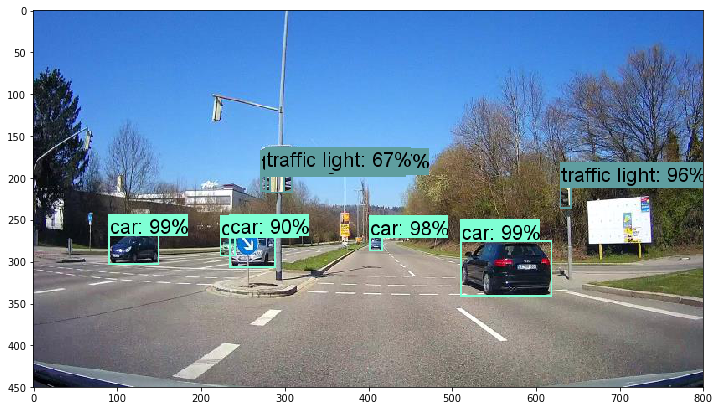

Loading image V:\01_job\12_datasets\05_traffic_scenes_in_allgaeu\res_800x450_jpg/02.jpg
image size = (800, 450)


In [ ]:
from timeit import default_timer as timer
from object_detection.utils import visualization_utils as vis_util

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


# 1. for all images in the image path ...
nr_files = len(ABSOLUTE_IMAGE_FILENAMES)
for file_nr in range(0,nr_files):
    
    # 1.1 show image file name
    absolute_filename = ABSOLUTE_IMAGE_FILENAMES[file_nr]
    only_filename = FILENAMES_ONLY[file_nr]
    
    # 1.2 load in the image
    print("Loading image", absolute_filename)
    image = Image.open(absolute_filename)
    print("image size =", image.size)
        
    resize = False
    if resize:
        fac = 0.5        
        new_width  = int(image.width*fac)
        new_height = int(image.height*fac)
        image = image.resize((new_width, new_height))
        print("image size after resize =", image.size)
    
    # 1.3 image -> image_np = NumPy array
    # image_np is used for drawing detection
    # bounding boxes on it
    image_np = load_image_into_numpy_array(image)
    #print(image_np)
    
    # 1.4
    # expand dimensions since the model expects
    # images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    
    # 1.5
    # run the CNN model,
    # i.e. object detection happens here!
    start = timer()
    output_dict = \
        run_inference_for_single_image(image_np_expanded,
                                       detection_graph)
    end = timer()
    elapsed_time_seconds = end - start
    print("Inference time: {:.2f} sec = {:.2f} FPS"
          .format(elapsed_time_seconds, 1.0/elapsed_time_seconds))
    
    # 1.6
    # show the output of the graph
    #print("output_dict=", output_dict)

    # 1.7
    # visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=2)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
        
    # 1.8 save image
    # note: savefig() has to be called
    #       before show().
    #       Else, saved figure is empty,
    #       since show() creates already
    #       the next empty figure
    save = True
    if save:
        save_folder = "V:\\tmp\\"
        save_filename = save_folder + "DET_" + only_filename
        plt.savefig(save_filename)
    
    # 1.9 show the figure in the Jupyter notebook
    plt.show()
        